In [75]:
%matplotlib inline
import IPython
import librosa
import librosa.display
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
audio_data = 'not_rick_roll.mp3'
y, sr = librosa.load(audio_data)

Функция load считывает аудио-файл в виде временного рядя. Где, sr обозначает sample_rate.

Time series (временной ряд) представлен массивом.
sample_rate — это количество сэмплов на секунду аудио.
По умолчанию звук микшируется в моно. Но его можно передискретизировать во время загрузки до 22050 Гц. Это делается с помощью дополнительных параметров в функции librosa.load

In [77]:
print(type(y), type(sr))
print(y.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(177304,) 22050


С помощью IPython.display можно проигрывать аудио в Jupyter Notebook, а с помощью display.waveshow формируются звуковые волны и мы можем посмотреть, как выглядит звук:

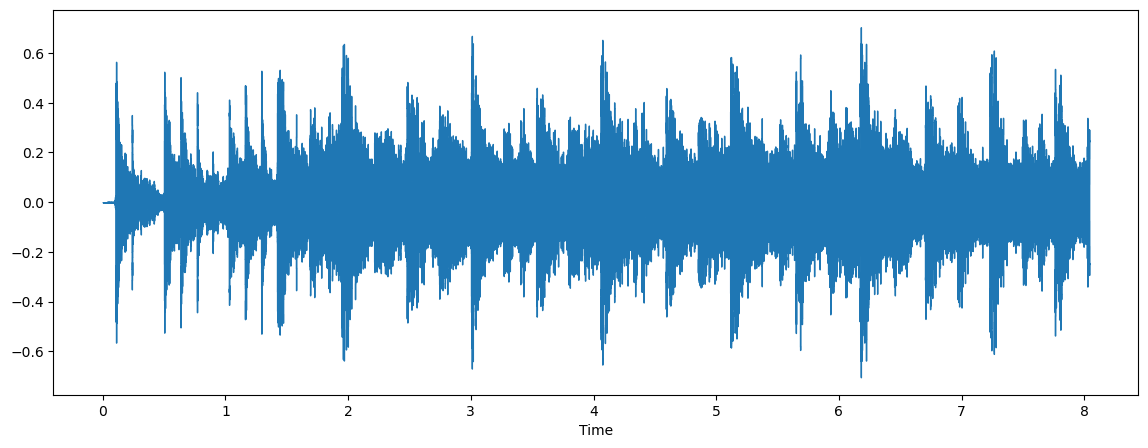

In [78]:
import IPython.display as ipd
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(audio_data)

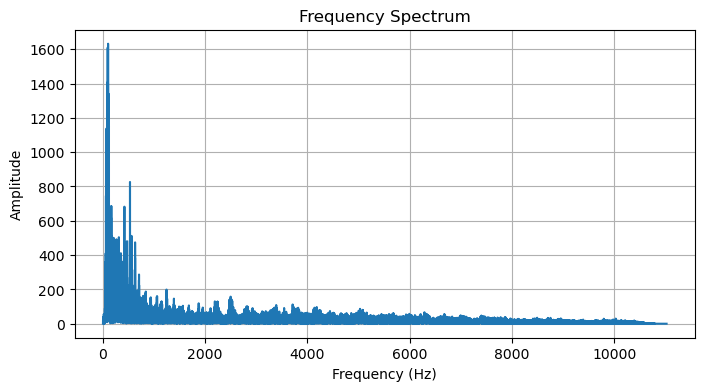

In [79]:
# Compute the FFT of the waveform
from scipy.fft import fft
spectrum = fft(y)
 
# Frequency bins
frequencies = np.fft.fftfreq(len(spectrum), 1 / sr)
 
# Plot the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Harmonic + Percussive')

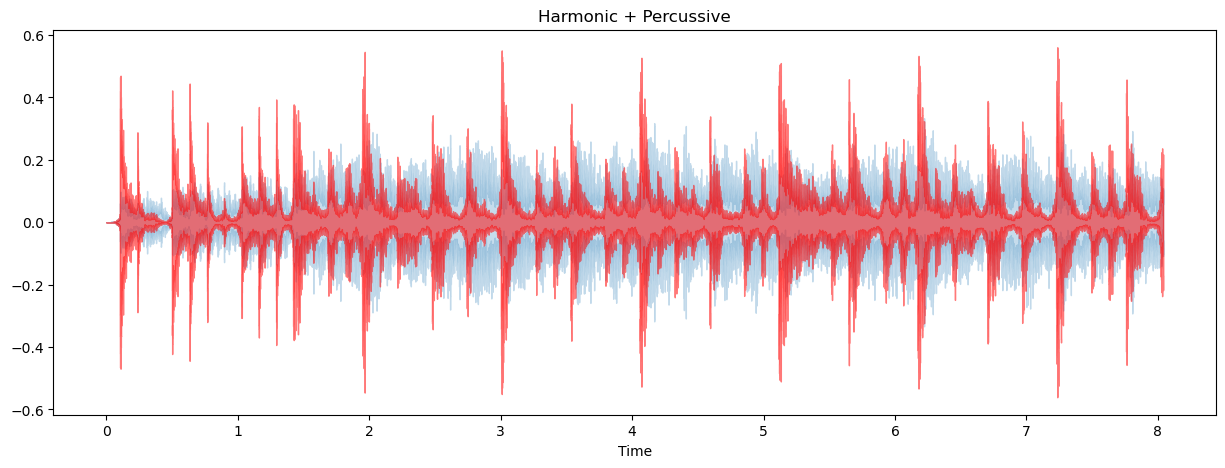

In [80]:
# Seperation of Harmonic and Percussive Signals
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

Извлечение признаков из аудиофайла
У сэмпла есть несколько важных признаков. Есть фундаментальное понятие ритма в некоторых формах, а остальные либо имеют свою нюансы, либо связаны:

Темп: скорость, с которой паттерны повторяются. Темп измеряется в битах в минуту (BPM). Если у музыки 120 BPM, это значит, что каждую минуту в ней 120 битов (ударов).
Бит: отрезок времени. Это ритм, выстукиваемый в песне. Так, в одном такте 4 бита, например.
Такт: логичное деление битов. Обычно в такте 3 или 4 бита, хотя возможны и другие варианты.
Интервал: в программах для редактирования чаще всего встречаются интервалы. Обычно есть последовательность нот, например, 8 шестнадцатых одинаковой длины. Обычно интервал — 8 нот, триплеты или четверные.
Ритм: список музыкальных звуков. Все ноты и являются ритмом.

Изначально ошибка была в том, что barplot() больше не принимает два позиционных аргумента, таких как x и y, а вместо этого требует указания этих аргументов по имени (т.е. через ключевые слова).
Также palette больше нельзя использовать без указания параметра hue - можно установить hue=x. Еще прописал legend=False, чтобы не мешалась на картинке.

Detected Tempo: [112.34714674] beats/min
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]


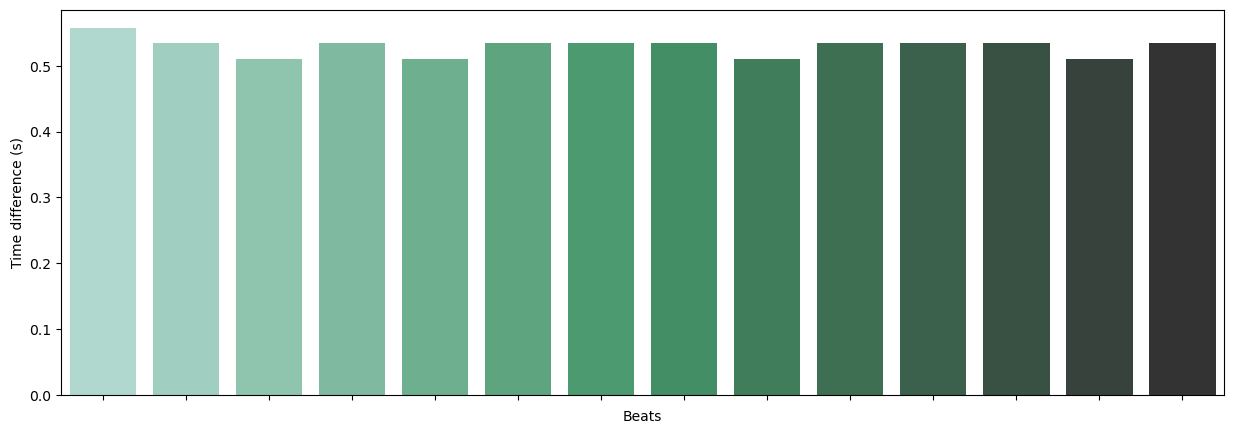

In [81]:
# Beat Extraction
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

print(beat_nums)

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(x=beat_nums, y=beat_time_diff, hue=beat_nums, legend=False, palette="BuGn_d", ax=ax)
g=g.set(xticklabels=[])

Мел-кепстральные коэффициенты (MFCC)

Text(0.5, 1.0, 'MFCC')

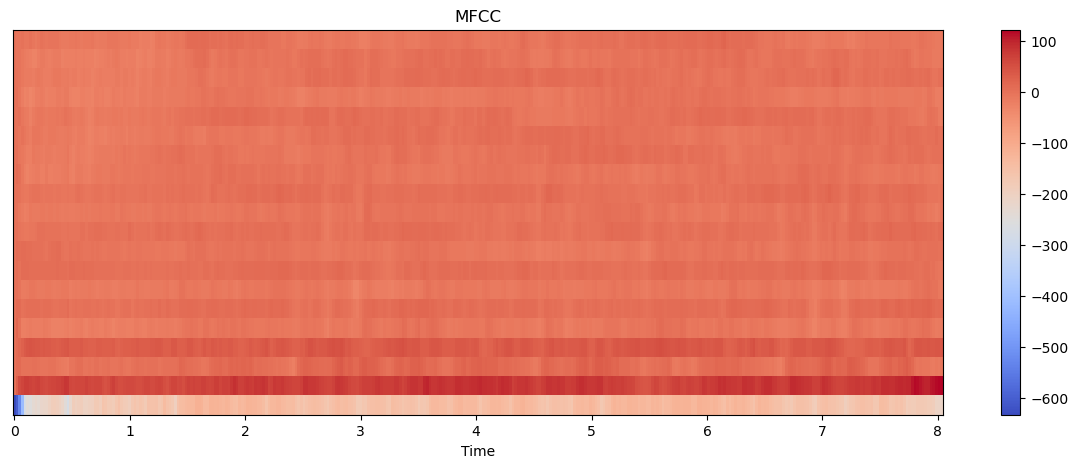

In [82]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [83]:
mfccs

array([[-6.3240070e+02, -6.0245551e+02, -5.2331696e+02, ...,
        -2.0584062e+02, -2.0868652e+02, -2.0900624e+02],
       [ 9.2472747e-02,  2.9601231e+01,  5.4750965e+01, ...,
         1.1659738e+02,  1.2167072e+02,  1.2247748e+02],
       [ 9.2451856e-02,  1.2101152e+01,  1.1335679e+01, ...,
        -8.3261395e+00, -1.0412052e+01, -6.5538611e+00],
       ...,
       [ 9.0474501e-02, -1.4987040e-01, -3.8172402e+00, ...,
        -3.7362900e+00,  1.5863380e+00,  2.1553130e+00],
       [ 9.0232641e-02, -3.6717799e+00, -3.7320166e+00, ...,
        -1.1404800e+01, -1.1323591e+01, -9.3432817e+00],
       [ 8.9977205e-02, -1.4333725e+00, -1.9277722e+00, ...,
        -1.2272274e+01, -1.0660368e+01, -9.4824533e+00]], dtype=float32)

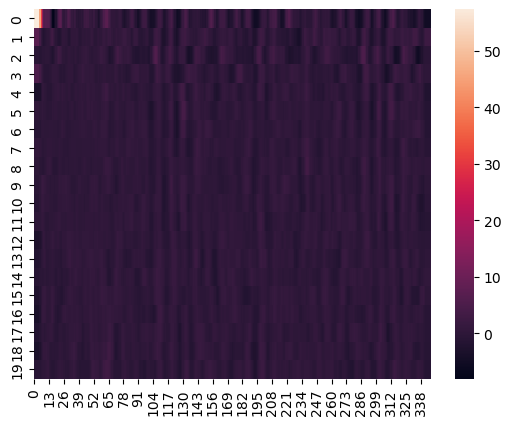

In [84]:
mfcc_delta = librosa.feature.delta(mfccs)
sns.heatmap(mfcc_delta)
plt.show()

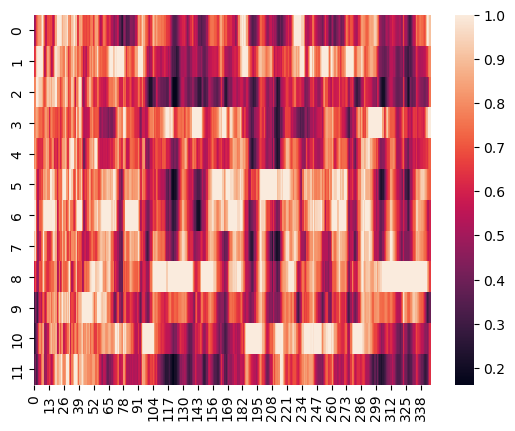

In [85]:
# нормализация в хромограмму
chromagram = librosa.feature.chroma_cqt(y=y, sr=sr)
sns.heatmap(chromagram)
plt.show()

Спектрограмма

Спектрограмма - это визуальный способ представления уровня или “громкости” сигнала во времени на различных частотах, 
присутствующих в форме волны. Обычно изображается в виде тепловой карты. .stft() преобразует данные в кратковременное преобразование 
Фурье. С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала.

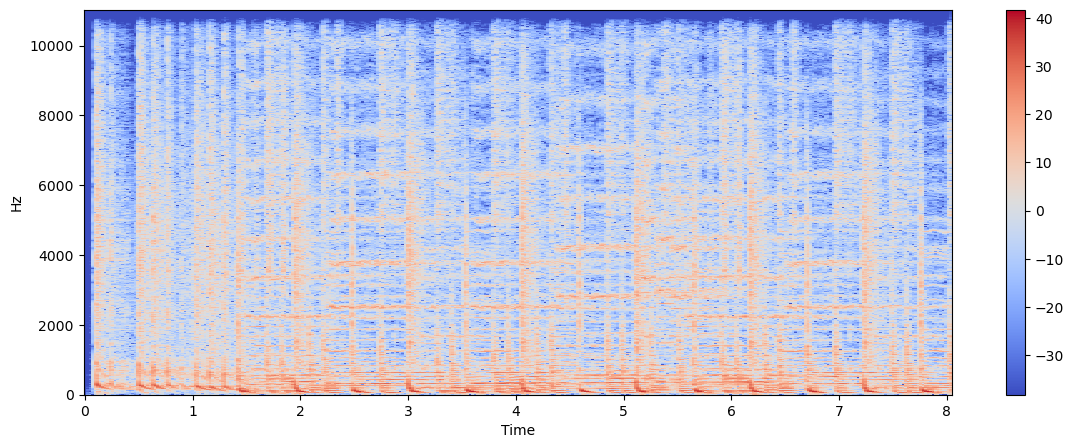

In [86]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Спектральный центроид - Spectral Centroid.

Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен “центр масс” для звука. 
librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале:

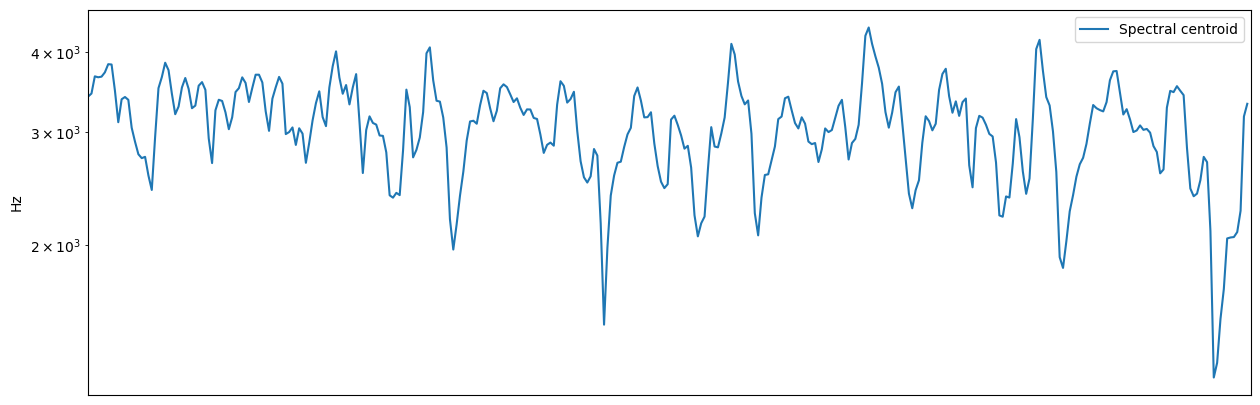

In [87]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

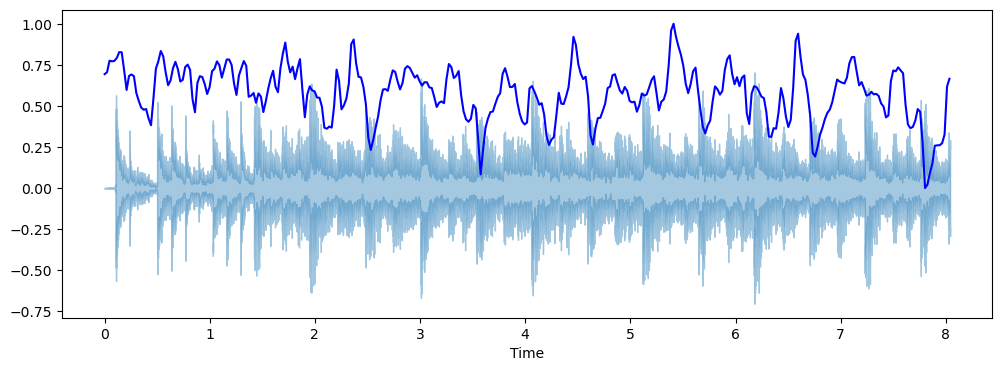

In [88]:
import sklearn
spectral_centroids = cent[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

**<h3>Что такое гармоническая и перкуссионная части сигнала, зачем они нужны?</h3>**

**Гармоническая часть сигнала** представляет собой устойчивую синусоидальную волну с определённой частотой, которую можно интерпретировать как высоту звука. В спектрограмме она отображается в виде горизонтальных линий, соответствующих стабильным частотным компонентам. Гармоническая часть характерна для звуков, производимых музыкальными инструментами, которые поддерживают устойчивую частоту, таких как струнные инструменты — например, виолончель или гитара.

**Перкуссионная часть сигнала** характеризуется резкими импульсами, локализованными во времени. На временной диаграмме она проявляется в виде резких скачков амплитуды, а на спектрограмме — как вертикальные линии, отражающие широкополосную структуру с высокой временной разрешающей способностью. В отличие от гармонической части, перкуссионная составляющая не обладает постоянной частотой и не воспринимается как звук определённой высоты. Яркими примерами перкуссионных звуков являются ударные инструменты, такие как барабаны.

**Основная цель выделения этих частей** состоит в разложении аудиосигнала на компоненты с различными временно-частотными характеристиками, что позволяет независимо обрабатывать каждый компонент. Гармоническая часть подходит для анализа устойчивых частотных структур, тогда как перкуссионная часть используется для анализа кратковременных, широкополосных компонент. Такое разложение делает возможным более точное преобразование, анализ и обработку сложных аудиосигналов в задачах музыкальной сегментации, ритмического и тонального анализа.